# **Proyecto integrador**

### 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento. Recuerden que el objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.




Carguen la base de datos preparada desde la fase 2.

### 1. Carga de datos

In [413]:
#incluimos los módulos y sub módulos que vamos a usar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [414]:
h = pd.read_csv("hospitalizacion.csv")

In [415]:
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                420 non-null    int64  
 1   EDAD                      420 non-null    float64
 2   PSA                       420 non-null    float64
 3   DIAS_HOSPITALIZACION_MQ   420 non-null    float64
 4   DIAS_HOSPITALIZACION_UPC  420 non-null    float64
 5   AGENTE_AISLADO_N          420 non-null    float64
 6   HOSPITALIZACION_N         420 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 23.1 KB


`DONDE: HOSPITALIZACION_N: 'SI':0, 'NO':1 `

In [452]:
#Importamos las herramientas que vamos a utilizar.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics

In [453]:
#### DIAS_HOSPITALIZACION_UPC y PSA. CORRELACION: 0,16

In [454]:
#x = h['AGENTE_AISLADO_N']
x = h['EDAD']

In [455]:
x = np.array(x)

In [456]:
x = x.reshape(-1,1)

In [457]:
y = h['DIAS_HOSPITALIZACION_UPC']

In [458]:
y = np.array(y)

In [459]:
y = y.reshape(-1,1)

Separen el dataset en X, y (variable objetivo)

In [460]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [461]:
clf = DecisionTreeClassifier()

In [462]:
# Entrenar el modelo con los datos de entrenamiento
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [463]:
# Predecimos sobre nuestro set de entrenamieto
y_train_pred = clf.predict(x_train)

# Predecimos sobre nuestro set de test
y_test_pred = clf.predict(x_test)

### METRICA N°1: La exactitud mide la frecuencia con la que el modelo es correcto.


In [467]:
# Calcular la EXACTITUD del modelo 
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud:", accuracy)

Exactitud: 1.0


In [468]:
# Comparamos 
print('Exactitud sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Exactitud sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Exactitud sobre conjunto de Train: 0.9897959183673469
Exactitud sobre conjunto de Test: 1.0


In [469]:
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred))

Error en datos de train: 0.07482993197278912
Error en datos de test: 0.0


Graficamos

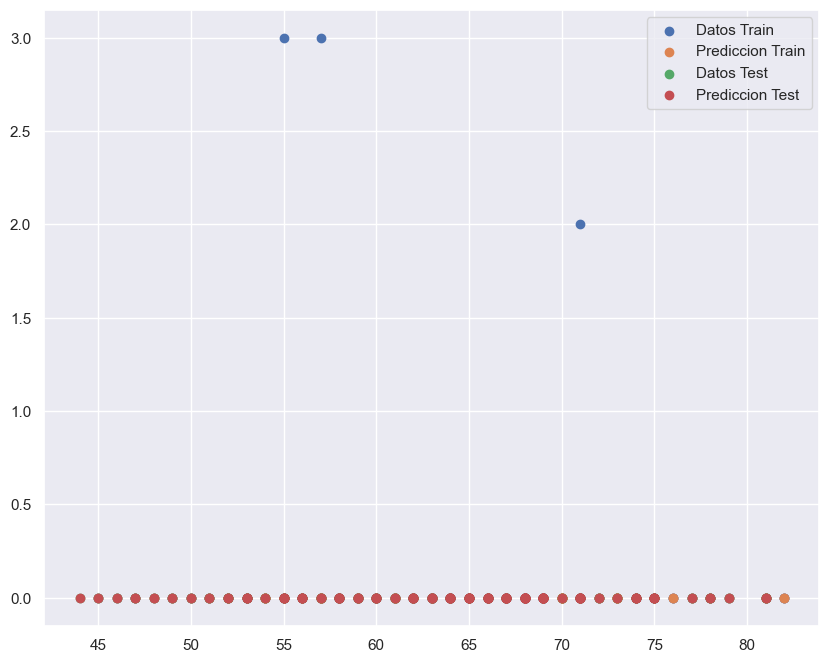

In [470]:
plt.figure(figsize = (10,8))

plt.scatter(x_train, y_train, label = 'Datos Train')
plt.scatter(x_train, y_train_pred, label = 'Prediccion Train')

plt.scatter(x_test, y_test, label = 'Datos Test')
plt.scatter(x_test, y_test_pred, label = 'Prediccion Test')

plt.legend()
plt.show()

In [471]:
confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)

In [472]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (2).

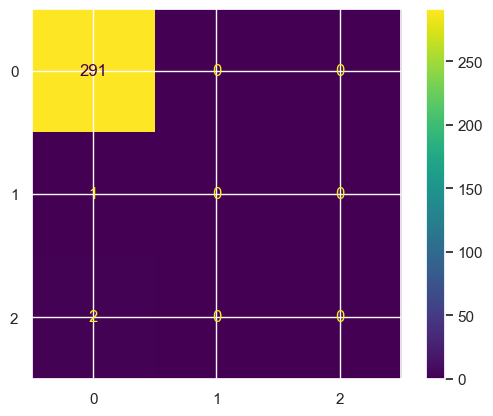

In [473]:
cm_display.plot()
plt.show()

#### DIAS_HOSPITALIZACION_UPC y PSA. CORRELACION: 0,16

Seleccione tres métricas de evaluación para este modelo de clasificación y describa el significado de cada una de ellas para el modelo creado.

Realice un diagrama de la importancia de cada variable respecto a la clasificación de la variable objetivo

Encuentre cuál sería un valor óptimo para el hiperparámetro **max_depth** para el árbol de decisión. Construya un modelo con este valor y compare las métricas de evaluación respecto al modelo creado con una profundidad arbitraria. 

Instancien, entrenen y predigan sobre un modelo de k-vecinos asignando una cantidad de vecinos k-aribitraria. 

Encuentre el valor óptimo para k

Halle las mismas tres métricas de evaluación para este modelo de clasificación y compare los valores para el performance, respecto al árbol de decisión cuyo hiperparámetro **max_depth** se optimizó. ¿Qué puede concluir? 

De acuerdo con lo aprendido en el módulo, ¿Cómo cree que se puede mejorar el performance de este modelo? 

R/